<a href="https://colab.research.google.com/github/ruchi243/Sales_Analysis_and_Forecasting/blob/main/XGBoost_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **XGBoost**

In [155]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [156]:
url = 'https://raw.githubusercontent.com/ruchi243/Exploratory_Data_Analysis/main/Sample%20-%20Superstore.csv'

In [157]:
import datetime as dt
dataset = pd.read_csv(url)

dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Order Month'] = pd.to_datetime(dataset['Order Date']).dt.month
dataset['Order Year'] = pd.to_datetime(dataset['Order Date']).dt.year
dataset.drop(["Row ID", "Customer ID","Order ID","Postal Code","Product ID","Product Name","Country","Ship Date","Order Date","Customer Name"], axis = 1, inplace = True)


display(dataset.head())

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,11,2016
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,11,2016
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6,2016
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,10,2015
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,10,2015


In [158]:
encoder = LabelEncoder()

In [159]:
dataset['City']=encoder.fit_transform(dataset['City'])
dataset['Segment']=encoder.fit_transform(dataset['Segment'])
dataset['Ship Mode']=encoder.fit_transform(dataset['Ship Mode'])
dataset['State']=encoder.fit_transform(dataset['State'])
dataset['Region']=encoder.fit_transform(dataset['Region'])
dataset['Category']=encoder.fit_transform(dataset['Category'])
dataset['Sub-Category']=encoder.fit_transform(dataset['Sub-Category'])


In [160]:
X = dataset.drop(columns='Sales', axis=1)


Y = dataset['Sales']

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6995, 12) (6995,)
(2999, 12) (2999,)


In [162]:
from sklearn.model_selection import GridSearchCV


In [163]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [164]:
xgb1.fit(X_train, Y_train)

[16:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [165]:
training_prediction = xgb1.predict(X_train)

In [166]:
r2_train = metrics.r2_score(Y_train, training_prediction)
print('R Squared Value =',r2_train )

R Squared Value = 0.8820936494708084


In [167]:
testing_prediction = xgb1.predict(X_test)

In [168]:
r2_test = metrics.r2_score(Y_test, testing_prediction)
print('R Squared Value =',r2_test )

R Squared Value = 0.6816086476296686


In [169]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [170]:
rmse = np.sqrt(mean_squared_error(Y_test, testing_prediction))
print("RMSE: %f" % (rmse))

RMSE: 441.240003


In [171]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[16:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [172]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,651.947469,36.246866,650.281514,69.494476
1,628.168294,29.212574,627.836446,80.190172
2,619.248942,30.326295,619.436462,81.736547
3,598.544840,42.490661,601.553121,68.559127
4,587.301616,43.146951,592.364848,68.929802


In [173]:
print((cv_results["test-rmse-mean"]).tail(1))

49    372.016652
Name: test-rmse-mean, dtype: float64


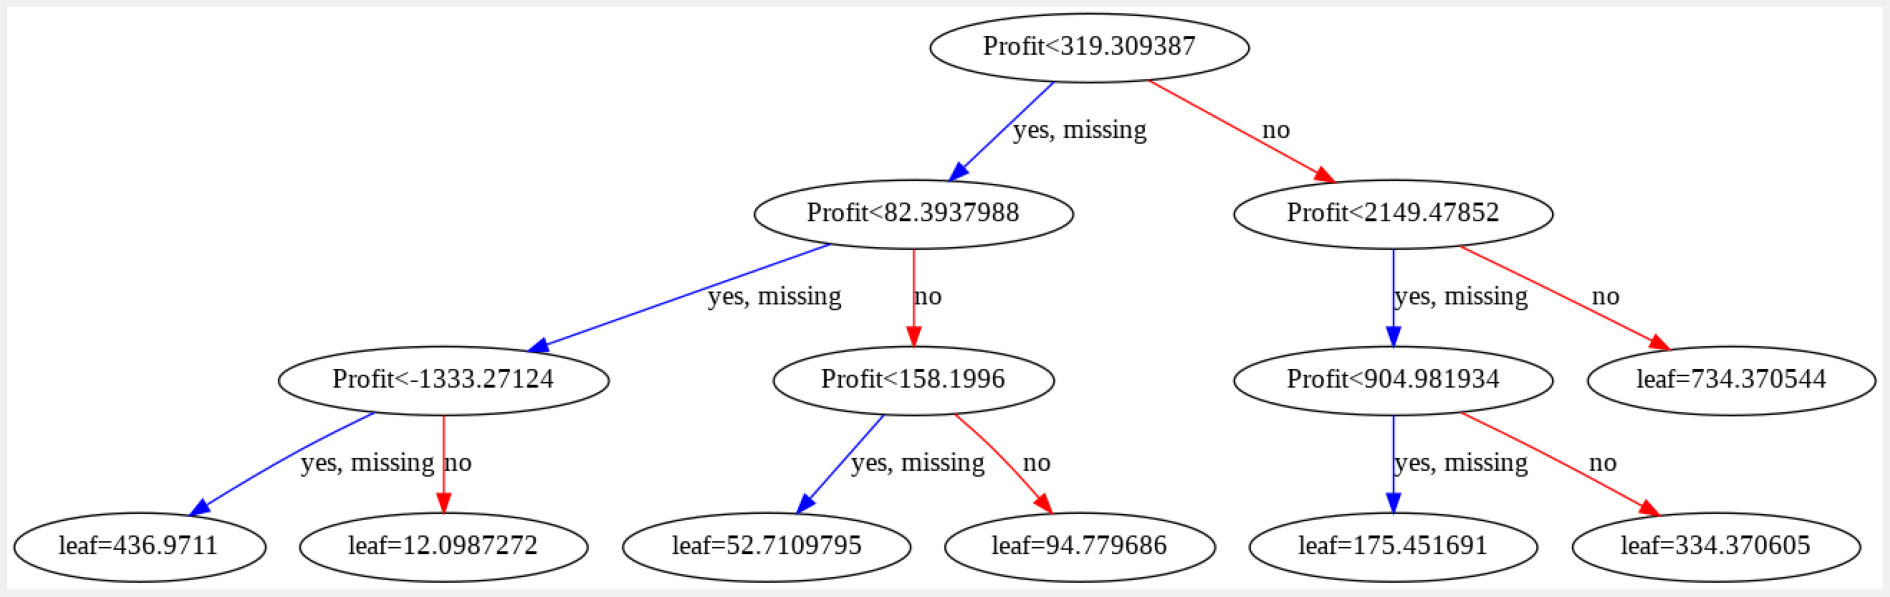

In [174]:
import matplotlib.pyplot as plt

xgb.plot_tree(xgb1,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

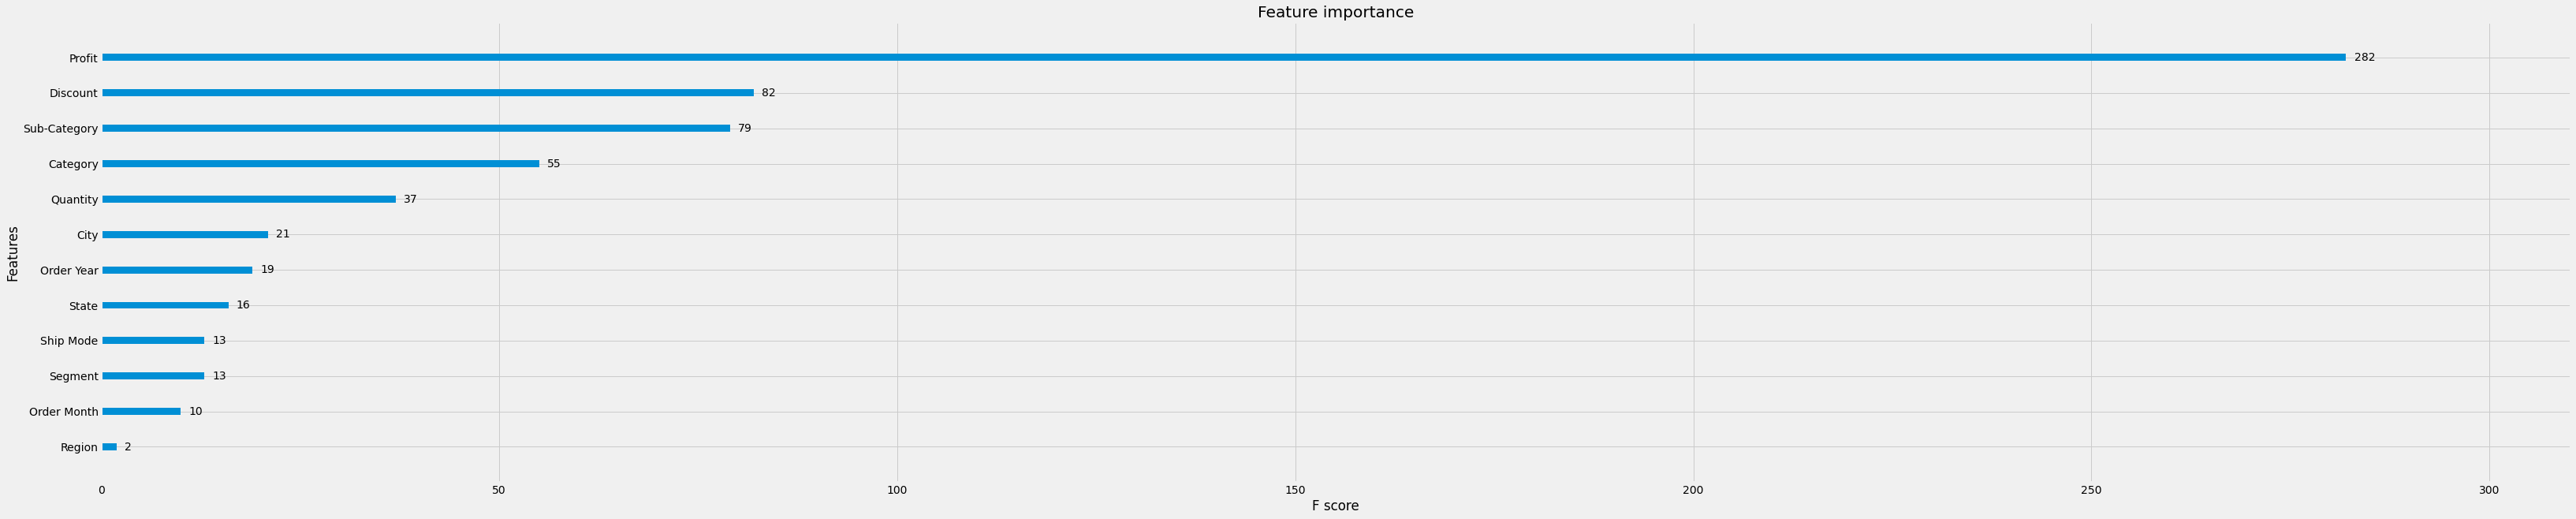

In [175]:
xgb.plot_importance(xgb1)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()